In [50]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import time

from libworm.model.beta_neuron import NeuronNetwork, from_connectome
from libworm.data import connectomes, traces
from libworm import preprocess
from libworm.functions import set_neurons, tcalc_s_inf, set_trace
from libworm.data.neuron import full_sensory_list

import json

from math import tau

In [51]:
with open("rust/processed_data/results.json", "r") as file:
    data = json.load(file)

data = np.array(data)

In [52]:
def show_large_voltage_data(data, count = None, per = 8.0, stride=1):
    
    if count is None:
        pass
    else:
        data = data[:, :count]

    size = int(np.ceil(np.sqrt(data.shape[1] / per)))

    fig, axs = plt.subplots(ncols=size, nrows=size, figsize=(5*12, 5*12))

    ax_index = -1
    
    # Voltage time curves
    for i in range(data.shape[1]):
        if i % per == 0:
            ax_index += 1
            
        axs[ax_index // size, ax_index % size].plot(data[::stride, i], label=f'V_m_{i}')
        
    plt.show()

In [53]:
data.shape

(10001, 280)

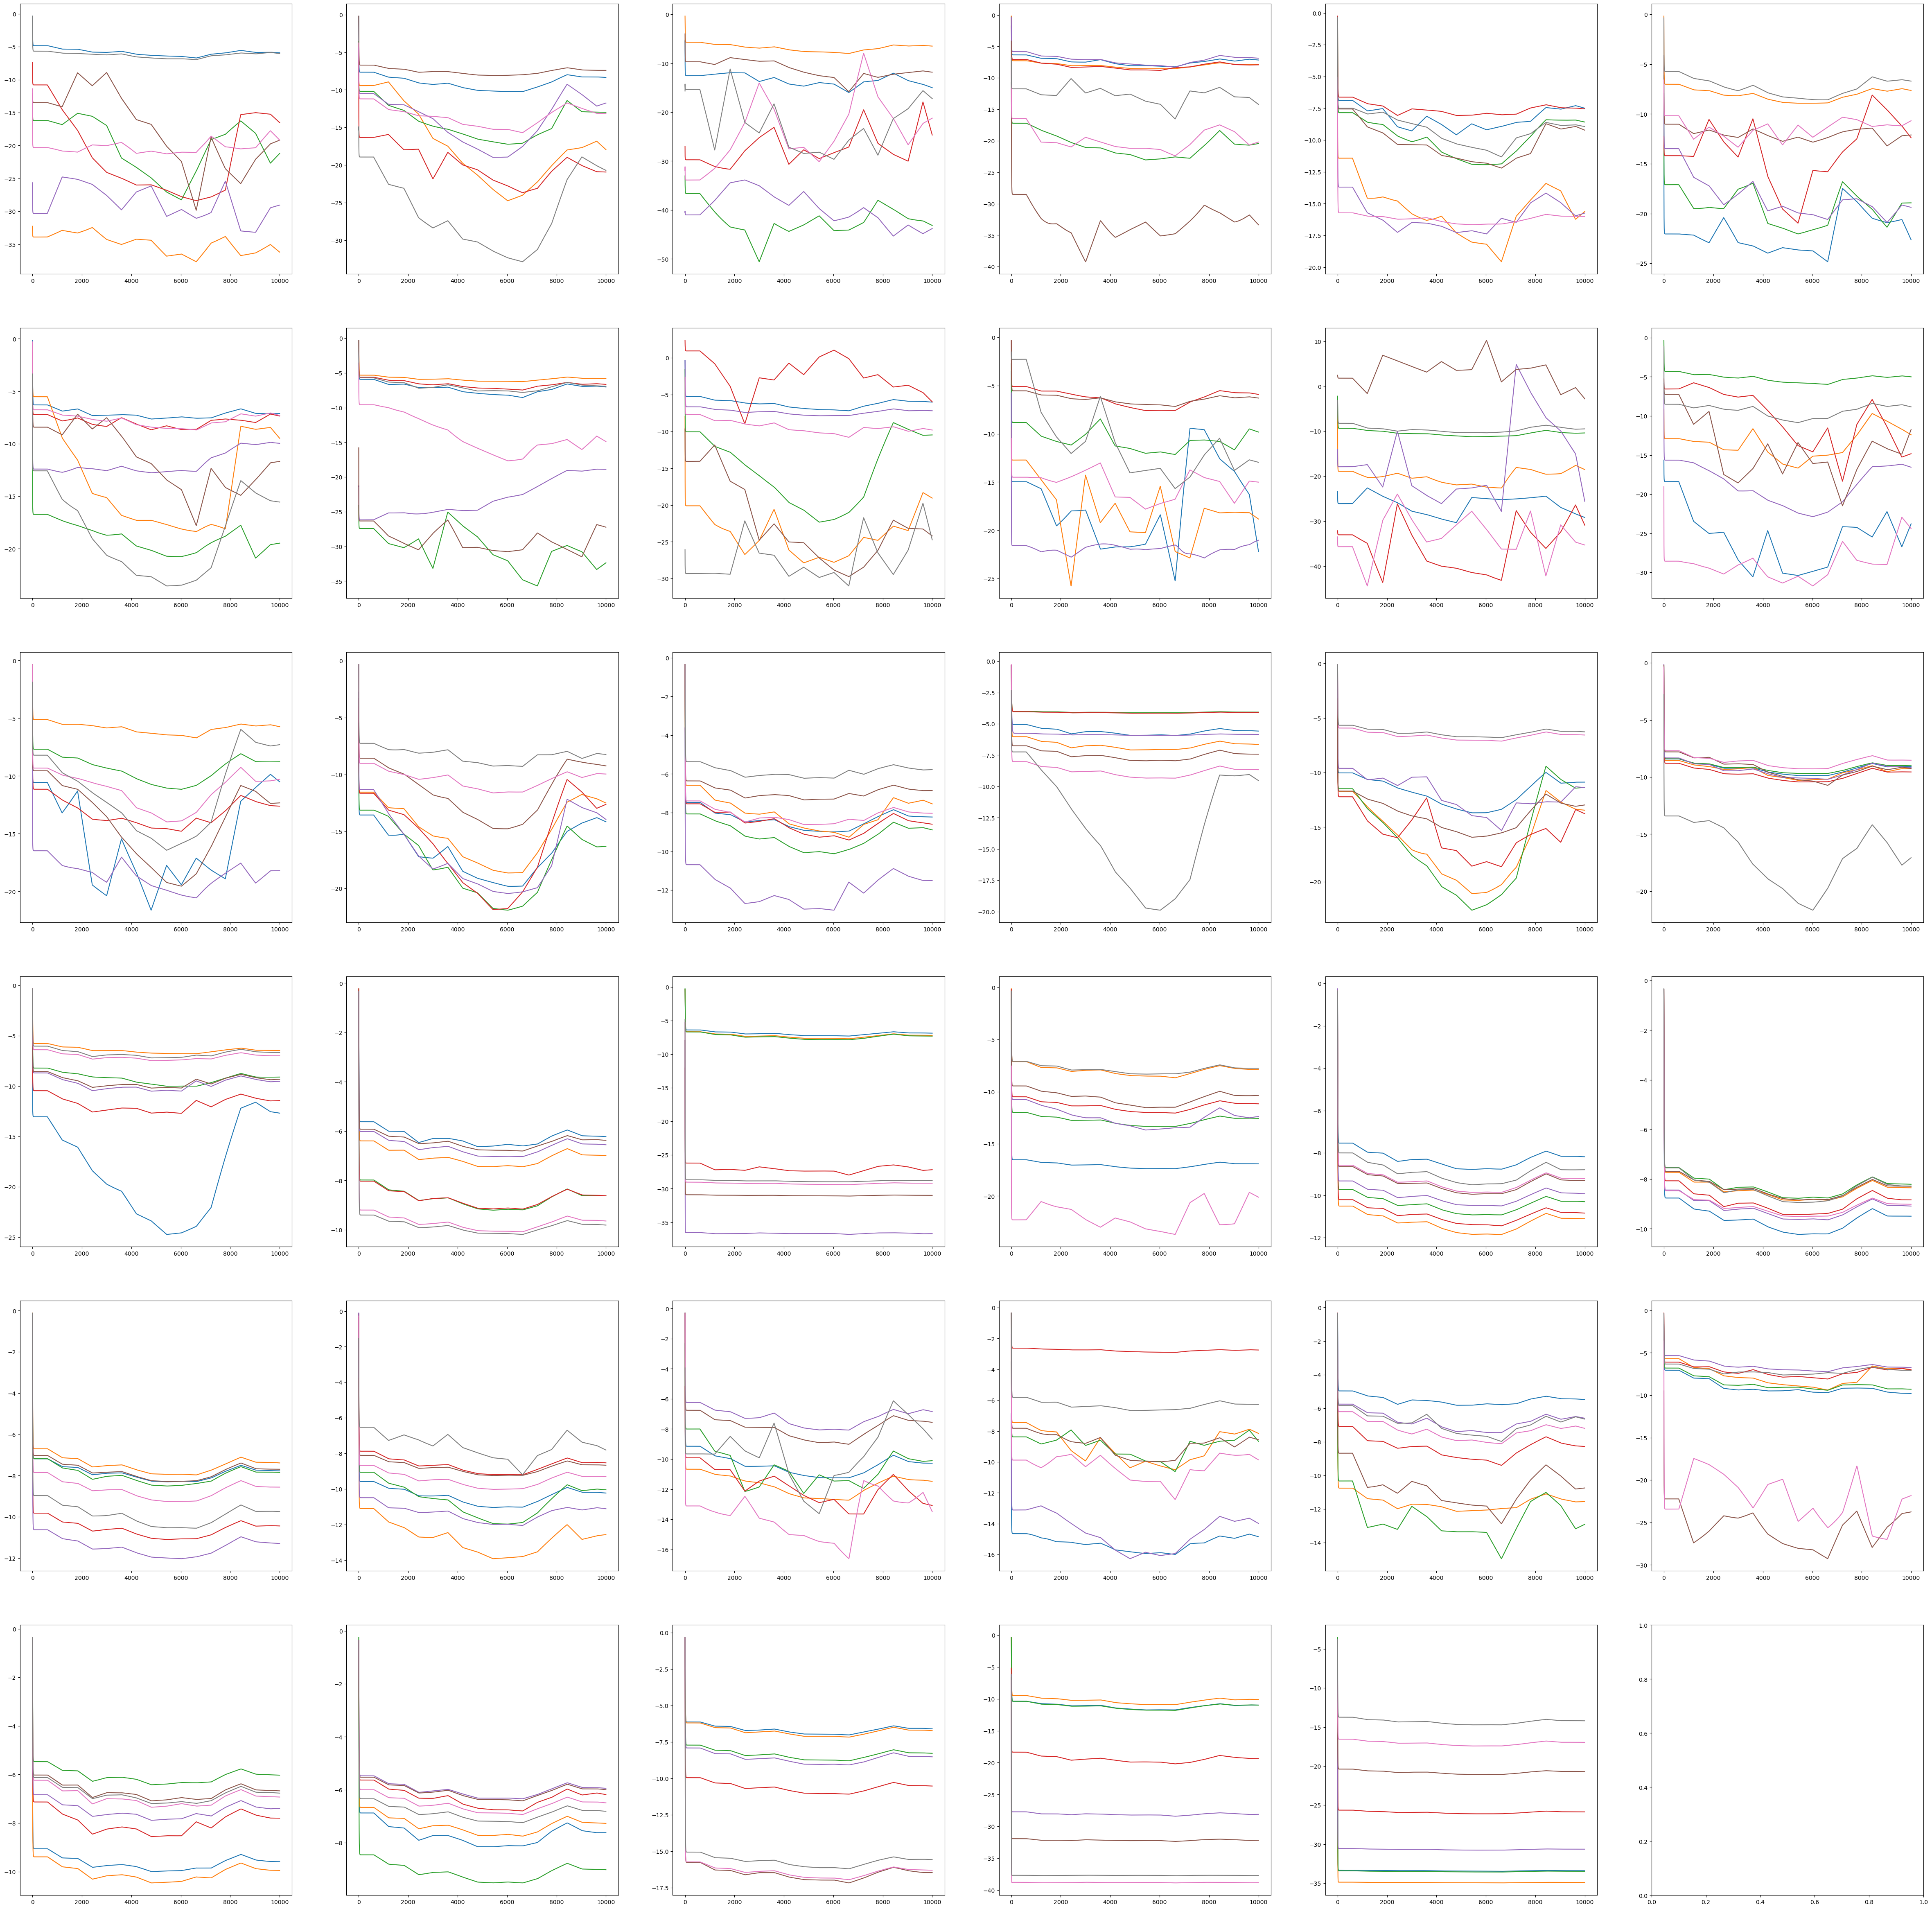

In [54]:
show_large_voltage_data(data)